In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
%config IPCompleter.greedy=True

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_c = pd.read_csv(city_data_to_load)
df_r = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_c,df_r,on='city',how='right')

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

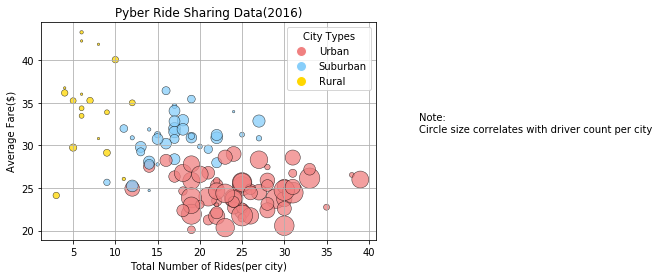

<Figure size 720x432 with 0 Axes>

In [2]:
# Obtain the x and y coordinates for each of the three city types
df_urban = df.loc[df['type']=='Urban']
df_rural = df.loc[df['type']=='Rural']
df_suburb = df.loc[df['type']=='Suburban']

y_urban = df_urban.groupby('city')['fare'].mean()
y_urban = df_urban.groupby('city')['fare'].count()
y_rural = df_rural.groupby('city')['fare'].mean()
y_suburb = df_suburb.groupby('city')['fare'].mean()

x_total_rides = df.groupby('city')['ride_id'].count()

col=[]
driver_count=[]
df_csorted = df_c.sort_values(by='city')
for x in range(len(df_c)):

    citytype = df_csorted.iloc[x,2]
    driver_count.append(df_csorted.iloc[x,1])
    if citytype == 'Urban':
        col.append('lightcoral')
    elif citytype == 'Suburban':
        col.append('lightskyblue')
    else:
        col.append('gold')
    
#print(driver_count)
s = [ 6 * driver_count[x] for x in range(len(driver_count))]

# Build the scatter plots for each city types
y_axis = df.groupby('city')['fare'].mean()
fg, ax = plt.subplots()
lines = ax.scatter(x_total_rides,y_axis,
           s=s,
           c=col,
           edgecolors='black',
           alpha = 0.75,
           linewidth = 0.5)

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel('Total Number of Rides(per city)')
ax.set_ylabel('Average Fare($)')
ax.set_title('Pyber Ride Sharing Data(2016)')
plt.figure(figsize=(10,6))

# Create a legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Urban',markerfacecolor='lightcoral', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Suburban',markerfacecolor='lightskyblue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Rural',markerfacecolor='gold', markersize=10)]
ax.legend(handles=legend_elements, loc='best',title='City Types')
# Incorporate a text label regarding circle size
fg.text(1,0.5,'Note: \nCircle size correlates with driver count per city')

# Save Figure
fg.savefig('pyber.png')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

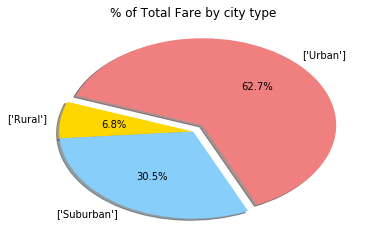

In [4]:
# Calculate Type Percents
fares = df.groupby('type')['fare'].sum()
types = df.groupby('type')['type'].unique()
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
# Build Pie Chart
plt.title('% of Total Fare by city type')
plt.pie(fares, labels=types,colors=colors, explode=explode,shadow=True,startangle=160, autopct='%.1f%%')
# Save Figure
plt.savefig('pie_fareByCityType.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

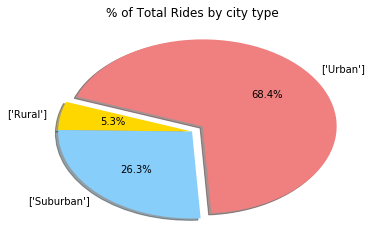

In [6]:
# Calculate Ride Percents
total_ride = df.groupby('type')['ride_id'].count()
types = df.groupby('type')['type'].unique()
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
# Build Pie Chart
plt.title('% of Total Rides by city type')
plt.pie(total_ride, labels=types,colors=colors, explode=explode,shadow=True,startangle=160, autopct='%.1f%%')
# Save Figure
plt.savefig('pie_TotalRideByCityType.png')



In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

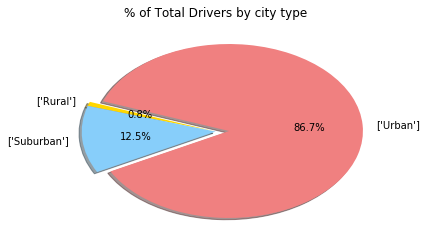

In [8]:
# Calculate Driver Percents

driver_count = df.groupby('type')['driver_count'].sum()
types = df.groupby('type')['type'].unique()
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.1]
# Build Pie Chart
plt.title('% of Total Drivers by city type')
plt.pie(driver_count, labels=types,colors=colors, explode=explode,shadow=True,startangle=160, autopct='%.1f%%')
# Save Figure
plt.savefig('pie_TotalDriverByCityType.png')


In [9]:
# Show Figure
plt.show()